<a href="https://colab.research.google.com/github/Akshaya-Reddy20/AIML_Projects_Labs/blob/main/Akshaya_Module_4_Lab_1_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [19]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [20]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [21]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [22]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

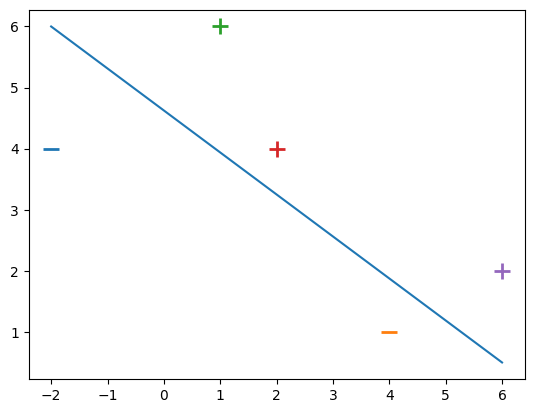

In [23]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

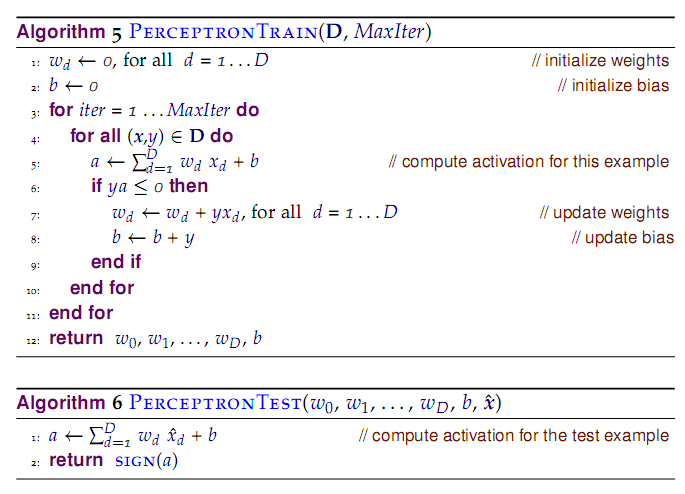

The algorithm is shown in the above image.

In [24]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [25]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

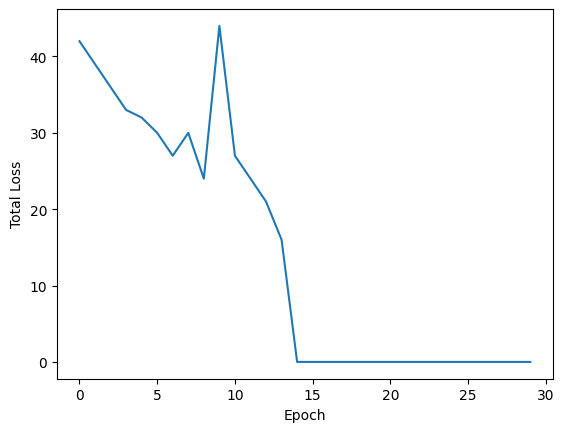

In [26]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

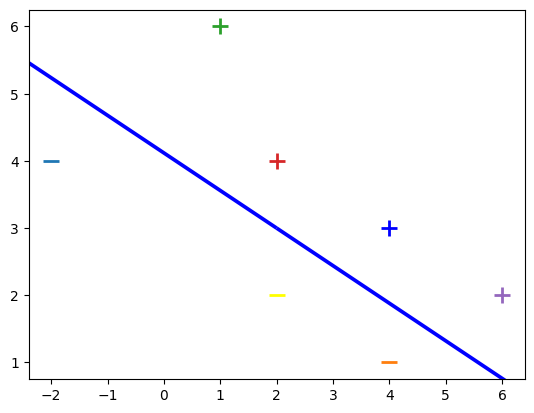

In [27]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [28]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [29]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


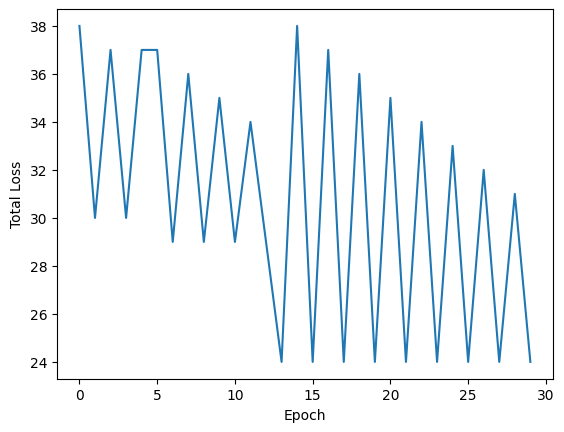

In [30]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

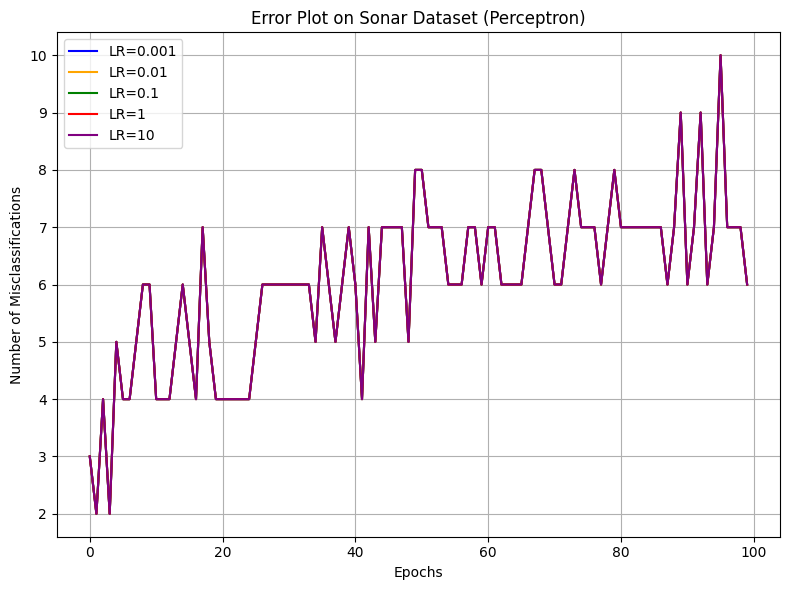


--- Misclassifications per Epoch ---

Learning Rate = 0.001
[3, 2, 4, 2, 5, 4, 4, 5, 6, 6, 4, 4, 4, 5, 6, 5, 4, 7, 5, 4, 4, 4, 4, 4, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 7, 6, 5, 6, 7, 6, 4, 7, 5, 7, 7, 7, 7, 5, 8, 8, 7, 7, 7, 6, 6, 6, 7, 7, 6, 7, 7, 6, 6, 6, 6, 7, 8, 8, 7, 6, 6, 7, 8, 7, 7, 7, 6, 7, 8, 7, 7, 7, 7, 7, 7, 7, 6, 7, 9, 6, 7, 9, 6, 7, 10, 7, 7, 7, 6]

Learning Rate = 0.01
[3, 2, 4, 2, 5, 4, 4, 5, 6, 6, 4, 4, 4, 5, 6, 5, 4, 7, 5, 4, 4, 4, 4, 4, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 7, 6, 5, 6, 7, 6, 4, 7, 5, 7, 7, 7, 7, 5, 8, 8, 7, 7, 7, 6, 6, 6, 7, 7, 6, 7, 7, 6, 6, 6, 6, 7, 8, 8, 7, 6, 6, 7, 8, 7, 7, 7, 6, 7, 8, 7, 7, 7, 7, 7, 7, 7, 6, 7, 9, 6, 7, 9, 6, 7, 10, 7, 7, 7, 6]

Learning Rate = 0.1
[3, 2, 4, 2, 5, 4, 4, 5, 6, 6, 4, 4, 4, 5, 6, 5, 4, 7, 5, 4, 4, 4, 4, 4, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 7, 6, 5, 6, 7, 6, 4, 7, 5, 7, 7, 7, 7, 5, 8, 8, 7, 7, 7, 6, 6, 6, 7, 7, 6, 7, 7, 6, 6, 6, 6, 7, 8, 8, 7, 6, 6, 7, 8, 7, 7, 7, 6, 7, 8, 7, 7, 7, 7, 7, 7, 7, 6, 7, 9, 6, 7, 9, 6, 7, 10, 7,

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading Sonar Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df = pd.read_csv(url, header=None)

# Spliting into features (X) and labels (y)
X = df.iloc[:, :-1].values.astype(float)
y = np.where(df.iloc[:, -1] == 'R', -1, 1)  # R = -1, M = 1
X = np.insert(X, X.shape[1], -1, axis=1)  # Add bias term

# Perceptron Training Function
def perceptron_with_plot(X, y, lr=1.0, max_epochs=100):
    w = np.zeros(X.shape[1])
    errors_per_epoch = []

    for epoch in range(max_epochs):
        errors = 0
        for xi, target in zip(X, y):
            if target * np.dot(w, xi) <= 0:
                w += lr * target * xi
                errors += 1
        errors_per_epoch.append(errors)
    return w, errors_per_epoch

# Tring Multiple Learning Rates
learning_rates = [0.001, 0.01, 0.1, 1, 10]
colors = ['blue', 'orange', 'green', 'red', 'purple']

plt.figure(figsize=(8, 6))

# Storing error values for each learning rate
all_errors = {}

for lr, color in zip(learning_rates, colors):
    _, errors = perceptron_with_plot(X, y, lr=lr, max_epochs=100)
    all_errors[lr] = errors  # Save for display
    plt.plot(errors, label=f"LR={lr}", color=color)

# Ploting
plt.xlabel("Epochs")
plt.ylabel("Number of Misclassifications")
plt.title("Error Plot on Sonar Dataset (Perceptron)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Displaing error values for each learning rate
print("\n--- Misclassifications per Epoch ---")
for lr in learning_rates:
    print(f"\nLearning Rate = {lr}")
    print(all_errors[lr])

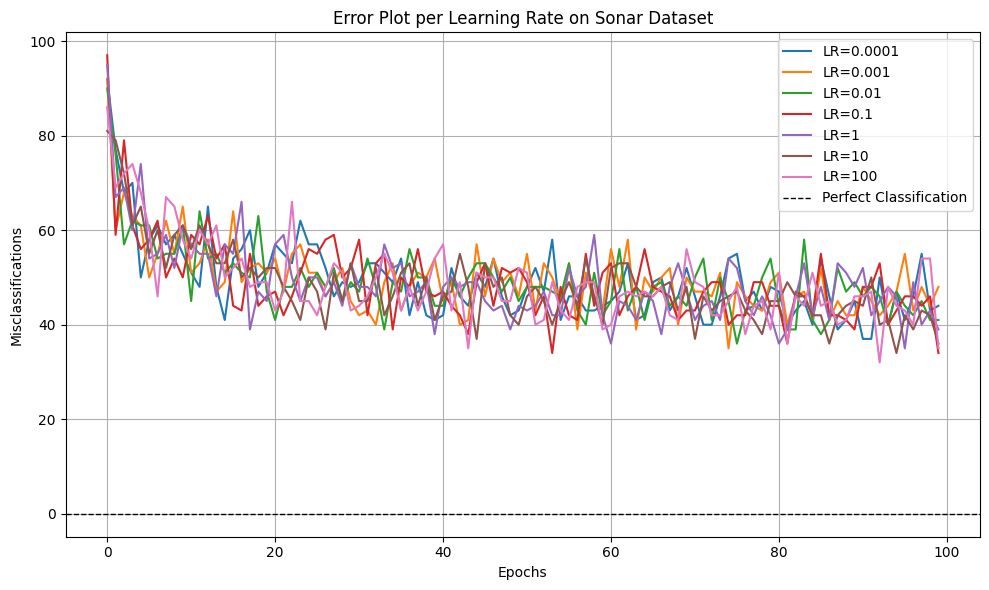


 Perceptron Convergence Summary
  Learning Rate |  Final Errors |  Epochs |  Converged
------------------------------------------------------
         0.0001 |            44 |     100 |      False
          0.001 |            48 |     100 |      False
           0.01 |            41 |     100 |      False
            0.1 |            34 |     100 |      False
              1 |            39 |     100 |      False
             10 |            36 |     100 |      False
            100 |            35 |     100 |      False


In [32]:
def perceptron_with_diagnostics(X, y, lr=1.0, max_epochs=1000):
    w = np.zeros(X.shape[1])
    errors_per_epoch = []

    for epoch in range(max_epochs):
        errors = 0
        indices = np.random.permutation(len(X))
        for i in indices:
            xi = X[i]
            target = y[i]
            if target * np.dot(w, xi) <= 0:
                w += lr * target * xi
                errors += 1
        errors_per_epoch.append(errors)
        if errors == 0:
            return w, errors_per_epoch, True
    return w, errors_per_epoch, False


# Learning rates to test
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# Storing results
summary = []

plt.figure(figsize=(10, 6))
for lr in learning_rates:
    _, errors, converged = perceptron_with_diagnostics(X, y, lr=lr, max_epochs=100)
    final_errors = errors[-1]
    total_epochs = len(errors)
    summary.append((lr, final_errors, total_epochs, converged))
    plt.plot(errors, label=f"LR={lr}")

# Ploting formatting
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Perfect Classification')
plt.xlabel("Epochs")
plt.ylabel("Misclassifications")
plt.title("Error Plot per Learning Rate on Sonar Dataset")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Printing Summary Table
print("\n Perceptron Convergence Summary")
print(f"{'Learning Rate':>15} | {'Final Errors':>13} | {'Epochs':>7} | {'Converged':>10}")
print("-" * 54)
for lr, errors, epochs, converged in summary:
    print(f"{lr:>15} | {errors:>13} | {epochs:>7} | {str(converged):>10}")


A huge learning rate causes overshooting, where the weight updates bounce around the optimal decision boundary and:

* May not settle down.

* Could keep misclassifying, especially near the boundary.



[-11.  14.  -4.]
Final weights: [  4.0709   3.9501   2.0391  10.1068   8.1251  -0.6706  -6.8184  -5.5447
   9.124    6.5283  16.7496  10.2706   0.54    -1.476   -0.5076  -3.1228
  -3.3877  -1.9915   2.6929   1.7161   1.3789   1.6695   2.5215   6.6146
  -3.1087  -3.5534   0.6692   3.2051   0.6515   7.4913 -15.6309   3.4017
   2.6567  -4.04    -0.5522  -7.1599  -7.9698   3.2759   5.41   -12.4032
  -1.5953   2.654    6.6872   8.2646  12.0161   8.2263   5.2327  11.52
   8.2776  -0.8388   2.436    2.6299   0.9496   1.4599  -0.2704   0.2706
  -0.4718   1.1346   1.5636   0.8056  13.    ]
Final errors: 52
Converged: False


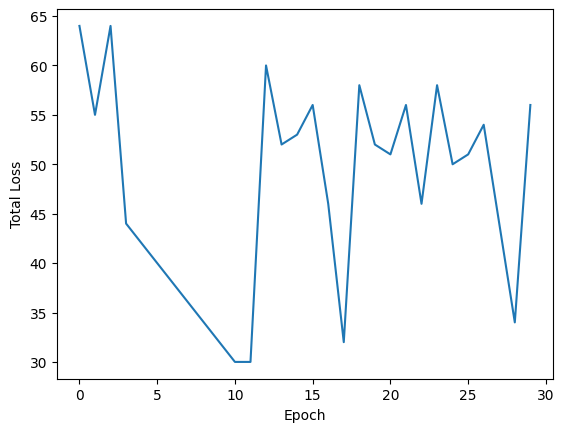

In [33]:
# Toy Dataset
# Non-linearly separable data (with bias term)
X1 = np.array([
    [1, 2, 1],
    [2, 3, 1],
    [3, 3, 1],
    [5, 2, 1],
    [6, 4, 1],
    [7, 3, 1],
    [8, 2, 1],
])

y1 = np.array([1, 1, -1, -1, 1, -1, -1])

print(perceptron_algo_plot(X1, y1))

final_weights, error_list, converged = perceptron_with_diagnostics(X, y, lr=1, max_epochs=25)

print("Final weights:", final_weights)
print("Final errors:", error_list[-1])
print("Converged:", converged)

Observation:
* The number of misclassifications never drops to zero.

* The weights keep changing but never stabilize.

* The algorithm does not converge.
This happens because the dataset is not linearly separable — no single line can divide all the +1 and -1 points correctly.

The perceptron algorithm only converges on linearly separable data. When it's not, the model either loops or continues updating without reaching a stable state.


## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

 Perceptron Learnability on Boolean Functions \\
Problem: \\
Given the dataset for the Boolean function AND over 2-bit binary inputs:

x1 |  x2 |  y \\
0  |  0  | - \\
0 |  1  | - \\
1 |  0  | - \\
1 |  1  | +  \\

We initialize:

Weights: w = [0, 0]

Bias: b = 0

i) Is this dataset learnable by a Perceptron? \\
Yes.The AND function is linearly separable, meaning there exists a line (or hyperplane in higher dimensions) that can perfectly separate the positive and negative examples.

ii) Weight Update Procedure

Using the Perceptron learning rule:

Update when ŷ ≠ y

w = w + η * y * x

b = b + η * y

Assume:

 '+' → 1, '-' → -1

Learning rate η = 1

Initial weights w = [0, 0]

Initial bias b = 0

In [34]:
# Inputs and labels for AND function
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
Y = np.array([-1, -1, -1, 1])  # Convert '-' to -1 and '+' to +1

# Initialize weights and bias
w = np.zeros(2)
b = 0
lr = 1

# Training loop
print("Initial Weights:", w, "Bias:", b)
for epoch in range(10):
    print(f"\nEpoch {epoch+1}")
    error_count = 0
    for i in range(len(X)):
        x = X[i]
        y = Y[i]
        activation = np.dot(w, x) + b
        y_pred = 1 if activation > 0 else -1

        if y_pred != y:
            w += lr * y * x
            b += lr * y
            error_count += 1
            print(f"Updated on x={x}, y={y}: Weights={w}, Bias={b}")
        else:
            print(f"No update needed for x={x}, y={y}: Prediction={y_pred}")

    if error_count == 0:
        print("\n Converged!")
        break


Initial Weights: [0. 0.] Bias: 0

Epoch 1
No update needed for x=[0 0], y=-1: Prediction=-1
No update needed for x=[0 1], y=-1: Prediction=-1
No update needed for x=[1 0], y=-1: Prediction=-1
Updated on x=[1 1], y=1: Weights=[1. 1.], Bias=1

Epoch 2
Updated on x=[0 0], y=-1: Weights=[1. 1.], Bias=0
Updated on x=[0 1], y=-1: Weights=[1. 0.], Bias=-1
No update needed for x=[1 0], y=-1: Prediction=-1
Updated on x=[1 1], y=1: Weights=[2. 1.], Bias=0

Epoch 3
No update needed for x=[0 0], y=-1: Prediction=-1
Updated on x=[0 1], y=-1: Weights=[2. 0.], Bias=-1
Updated on x=[1 0], y=-1: Weights=[1. 0.], Bias=-2
Updated on x=[1 1], y=1: Weights=[2. 1.], Bias=-1

Epoch 4
No update needed for x=[0 0], y=-1: Prediction=-1
No update needed for x=[0 1], y=-1: Prediction=-1
Updated on x=[1 0], y=-1: Weights=[1. 1.], Bias=-2
Updated on x=[1 1], y=1: Weights=[2. 2.], Bias=-1

Epoch 5
No update needed for x=[0 0], y=-1: Prediction=-1
Updated on x=[0 1], y=-1: Weights=[2. 1.], Bias=-2
No update needed fo

Output & Observation :
* Perceptron converges after a few epochs.

* It finds weights and bias that correctly separate the classes.

* This confirms the AND function is learnable using a perceptron.

### 2) Non-Linearly Separable Functions

There are 16 possible 2-bit Boolean functions.

Two of them are not linearly separable:

XOR

XNOR

In [35]:
# XOR dataset
X_xor = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
Y_xor = np.array([-1, 1, 1, -1])  # XOR labels

# Initialize weights and bias
w = np.zeros(2)
b = 0
lr = 1

# Training loop
print("Training Perceptron on XOR:")
for epoch in range(10):
    print(f"\nEpoch {epoch+1}")
    error_count = 0
    for i in range(len(X_xor)):
        x = X_xor[i]
        y = Y_xor[i]
        activation = np.dot(w, x) + b
        y_pred = 1 if activation > 0 else -1

        if y_pred != y:
            w += lr * y * x
            b += lr * y
            error_count += 1
            print(f"Update on x={x}, y={y}: Weights={w}, Bias={b}")
        else:
            print(f"No update needed for x={x}, y={y}: Prediction={y_pred}")

    if error_count == 0:
        print("\n Converged!")
        break
else:
    print("\n Perceptron did NOT converge on XOR (as expected).")


Training Perceptron on XOR:

Epoch 1
No update needed for x=[0 0], y=-1: Prediction=-1
Update on x=[0 1], y=1: Weights=[0. 1.], Bias=1
No update needed for x=[1 0], y=1: Prediction=1
Update on x=[1 1], y=-1: Weights=[-1.  0.], Bias=0

Epoch 2
No update needed for x=[0 0], y=-1: Prediction=-1
Update on x=[0 1], y=1: Weights=[-1.  1.], Bias=1
Update on x=[1 0], y=1: Weights=[0. 1.], Bias=2
Update on x=[1 1], y=-1: Weights=[-1.  0.], Bias=1

Epoch 3
Update on x=[0 0], y=-1: Weights=[-1.  0.], Bias=0
Update on x=[0 1], y=1: Weights=[-1.  1.], Bias=1
Update on x=[1 0], y=1: Weights=[0. 1.], Bias=2
Update on x=[1 1], y=-1: Weights=[-1.  0.], Bias=1

Epoch 4
Update on x=[0 0], y=-1: Weights=[-1.  0.], Bias=0
Update on x=[0 1], y=1: Weights=[-1.  1.], Bias=1
Update on x=[1 0], y=1: Weights=[0. 1.], Bias=2
Update on x=[1 1], y=-1: Weights=[-1.  0.], Bias=1

Epoch 5
Update on x=[0 0], y=-1: Weights=[-1.  0.], Bias=0
Update on x=[0 1], y=1: Weights=[-1.  1.], Bias=1
Update on x=[1 0], y=1: Weight

Final Observations:
* AND, OR, NAND, NOR, etc. are linearly separable → Learnable
*  XOR, XNOR are not linearly separable → Not learnable by basic Perceptron

Perceptron is limited to solving problems where the data is linearly separable

# Truth tables:

1. XOR (Exclusive OR) – Not Learnable \\
x₁ |	x₂ |	y(XOR) \\
0	| 0	| 0(-) \\
0	| 1	| 1(+) \\
1	| 0	| 1(+) \\
1	| 1	| 0(-) \\

* Label conversion (for perceptron): 0 → -1, 1 → +1

* No straight line can separate the positive and negative points.

2. XNOR (Exclusive NOR) – Not Learnable \\
x₁	| x₂ |	y(XNOR) \\
0 |	0 |	1(+) \\
0 |	1 |	0(-) \\
1 |	0 |	0(-) \\
1 |	1 |	1(+) \\

* Label conversion: 0 → -1, 1 → +1

* Also not linearly separable — positive outputs are diagonally opposite.